In [ ]:
!pip install -U torch==1.8.0+cu111 torchtext==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
exit()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
#question 2: 
#I have created a word file for this , which i will share, along with this collab link.

In [ ]:
#question 1:

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
import urllib.request
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
# Downloading the file from the URL
url = 'https://www.gutenberg.org/files/1661/1661-0.txt'
urllib.request.urlretrieve(url, 'sherlock.txt')

# Reading the text file
with open('sherlock.txt', 'r', encoding='utf-8') as f:
    text = f.read()
import re


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [ ]:
# Define the chapter headings with whitespace characters
chapter_headings = ['I. A SCANDAL IN BOHEMIA','II. THE RED-HEADED LEAGUE','III. A Case of Identity',   'IV. The Boscombe Valley Mystery',   
                    'V. The Five Orange Pips',  'VI. The Man with the Twisted Lip',  'VII. The Adventure of the Blue Carbuncle',   
                    'VIII. The Adventure of the Speckled Band',    'IX. The Adventure of the Engineer’s Thumb',    
                    'X. The Adventure of the Noble Bachelor',    'XI. The Adventure of the Beryl Coronet',    'XII. The Adventure of the Copper Beeches','* END OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES *']
chapters = [[] for _ in range(len(chapter_headings))]

chapter_headings = [heading.upper() for heading in chapter_headings]
print(chapter_headings)

# Spliting the text into chapters
chapters = [[] for _ in range(len(chapter_headings))]
current_chapter = -1
for line in text.split('\n'):
    if line in chapter_headings:
        current_chapter += 1
    if current_chapter >= 0:
        chapters[current_chapter].append(line)
        
# Store the contents of all chapters in a list
chapters_with_text = []
for chapter in chapters:
    chapters_with_text.append('\n'.join(chapter))
print("len of chapters_with_text:",len(chapters_with_text))
# print("printing text of chapter last")
# print(chapters_with_text[-2])

['I. A SCANDAL IN BOHEMIA', 'II. THE RED-HEADED LEAGUE', 'III. A CASE OF IDENTITY', 'IV. THE BOSCOMBE VALLEY MYSTERY', 'V. THE FIVE ORANGE PIPS', 'VI. THE MAN WITH THE TWISTED LIP', 'VII. THE ADVENTURE OF THE BLUE CARBUNCLE', 'VIII. THE ADVENTURE OF THE SPECKLED BAND', 'IX. THE ADVENTURE OF THE ENGINEER’S THUMB', 'X. THE ADVENTURE OF THE NOBLE BACHELOR', 'XI. THE ADVENTURE OF THE BERYL CORONET', 'XII. THE ADVENTURE OF THE COPPER BEECHES', '* END OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES *']
len of chapters_with_text: 13


In [ ]:
# Extracting the chapters_with_text for each set
train_chapters = chapters_with_text[0:7]
val_chapters = chapters_with_text[7:10]
test_chapters = chapters_with_text[10:]

# Preprocessing the text and add <sos> and <eos> tokens
def preprocess(text,counter):
    sentences = sent_tokenize(text)
    processed = []
    for sentence in sentences:
        words = ['<sos>'] + word_tokenize(sentence.lower()) + ['<eos>']
        counter+=1
        processed.append(words)
    return processed,counter

# Preprocess the chapters_with_text for each set
train_data = []
t_counter=0
v_counter=0
test_counter=0

# Report the sizes of the train, val, and test datasets

for chapter in train_chapters:
    l,t_counter=preprocess(chapter,t_counter)
    train_data.extend(l)

val_data = []
for chapter in val_chapters:
    l,v_counter=preprocess(chapter,v_counter)
    val_data.extend(l)

test_data = []
for chapter in test_chapters:
    l,test_counter=preprocess(chapter,test_counter)
    test_data.extend(l)

# Report the sizes of the train, val, and test datasets
print(f"Train set size: {len(train_data)} sequences and counter",t_counter)
print(f"Val set size: {len(val_data)} sequences and counter",v_counter)
print(f"Test set size: {len(test_data)} sequences and counter",test_counter)

Train set size: 2689 sequences and counter 2689
Val set size: 1112 sequences and counter 1112
Test set size: 1027 sequences and counter 1027


In [ ]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
import urllib.request
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
# Download the file from the URL
url = 'https://www.gutenberg.org/files/1661/1661-0.txt'
urllib.request.urlretrieve(url, 'sherlock.txt')

# Read the text file
with open('sherlock.txt', 'r', encoding='utf-8') as f:
    text = f.read()
import re



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [ ]:
# Define the chapter headings with whitespace characters
chapter_headings = ['I. A SCANDAL IN BOHEMIA','II. THE RED-HEADED LEAGUE','III. A Case of Identity',   'IV. The Boscombe Valley Mystery',   
                    'V. The Five Orange Pips',  'VI. The Man with the Twisted Lip',  'VII. The Adventure of the Blue Carbuncle',   
                    'VIII. The Adventure of the Speckled Band',    'IX. The Adventure of the Engineer’s Thumb',    
                    'X. The Adventure of the Noble Bachelor',    'XI. The Adventure of the Beryl Coronet',    'XII. The Adventure of the Copper Beeches','* END OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES *']
chapters = [[] for _ in range(len(chapter_headings))]

chapter_headings = [heading.upper() for heading in chapter_headings]
print(chapter_headings)

# Spliting the text into chapters
chapters = [[] for _ in range(len(chapter_headings))]
current_chapter = -1
for line in text.split('\n'):
    if line in chapter_headings:
        current_chapter += 1
    if current_chapter >= 0:
        chapters[current_chapter].append(line)
        
# Store the contents of all chapters in a list
chapters_with_text = []
for chapter in chapters:
    chapters_with_text.append('\n'.join(chapter))
print("len of chapters_with_text:",len(chapters_with_text))
# print("printing text of chapter last")
print(chapters_with_text[2])
# Extract the chapters_with_text for each set
train_chapters = chapters_with_text[0:7]
val_chapters = chapters_with_text[7:10]
test_chapters = chapters_with_text[10:13]

['I. A SCANDAL IN BOHEMIA', 'II. THE RED-HEADED LEAGUE', 'III. A CASE OF IDENTITY', 'IV. THE BOSCOMBE VALLEY MYSTERY', 'V. THE FIVE ORANGE PIPS', 'VI. THE MAN WITH THE TWISTED LIP', 'VII. THE ADVENTURE OF THE BLUE CARBUNCLE', 'VIII. THE ADVENTURE OF THE SPECKLED BAND', 'IX. THE ADVENTURE OF THE ENGINEER’S THUMB', 'X. THE ADVENTURE OF THE NOBLE BACHELOR', 'XI. THE ADVENTURE OF THE BERYL CORONET', 'XII. THE ADVENTURE OF THE COPPER BEECHES', '* END OF THE PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES *']
len of chapters_with_text: 13
III. A CASE OF IDENTITY


“My dear fellow,” said Sherlock Holmes as we sat on either side of the
fire in his lodgings at Baker Street, “life is infinitely stranger than
anything which the mind of man could invent. We would not dare to
conceive the things which are really mere commonplaces of existence. If
we could fly out of that window hand in hand, hover over this great
city, gently remove the roofs, and peep in at the queer things which
are goi

In [ ]:
import os
import string

import time, random, math, string
from torchtext.legacy import data
import numpy as np 
import pandas as pd 

import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.legacy.data import Field, TabularDataset, BucketIterator, Iterator

from torchtext.legacy.data import Field, Dataset, Example
from torchtext.legacy.datasets import LanguageModelingDataset

In [ ]:
tokenizer = lambda x:word_tokenize(x.lower())
reverse_tokenizer = lambda x: tokenizer(x)[::-1]

SRC = data.Field(tokenize=reverse_tokenizer, init_token='<sos>', eos_token='<eos>', lower=True)
TRG = data.Field(tokenize=tokenizer, init_token='<sos>', eos_token='<eos>', lower=True)



train_examples = []
val_examples = []
test_examples = []

# Step 3: Create examples for training set
for text in train_chapters:
    sentences = sent_tokenize(text)
    for i in range(len(sentences)-1):
        src = sentences[i]
        trg = sentences[i+1]
        train_examples.append(data.Example.fromlist([src, trg], fields=[('src', SRC), ('trg', TRG)]))

# Step 3: Create examples for validation set
for text in val_chapters:
    sentences = sent_tokenize(text)
    for i in range(len(sentences)-1):
        src = sentences[i]
        trg = sentences[i+1]
        val_examples.append(data.Example.fromlist([src, trg], fields=[('src', SRC), ('trg', TRG)]))

# Step 3: Create examples for test set
for text in test_chapters:
    sentences = sent_tokenize(text)
    for i in range(len(sentences)-1):
        src = sentences[i]
        trg = sentences[i+1]
        test_examples.append(data.Example.fromlist([src, trg], fields=[('src', SRC), ('trg', TRG)]))
# Step 6: Create datasets
train_data = Dataset(train_examples, fields=[('src', SRC), ('trg', TRG)])
valid_data = Dataset(val_examples, fields=[('src', SRC), ('trg', TRG)])
test_data = Dataset(test_examples, fields=[('src', SRC), ('trg', TRG)])

In [ ]:
print(f"total Number of training examples: {len(train_data.examples)}")
print(f"total Number of validation examples: {len(valid_data.examples)}")
print(f"total Number of test examples: {len(test_data.examples)}")

total Number of training examples: 2682
total Number of validation examples: 1109
total Number of test examples: 1025


In [ ]:
SRC.build_vocab(train_data, min_freq=2)
TRG.build_vocab(train_data, min_freq=2)

print(f"Unique tokens in source (de) vocabulary: {len(SRC.vocab)}")
print(f"Unique tokens in target (en) vocabulary: {len(TRG.vocab)}")

Unique tokens in source (de) vocabulary: 3133
Unique tokens in target (en) vocabulary: 3137


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

BATHC_SIZE = 128

# To minimize the amount of padding in both the source and target sentences, we utilize a BucketIterator 
#instead of the standard Iterator to create batches.




train_iteration, valid_iteration, test_iteration = BucketIterator.splits((train_data, valid_data, test_data),
                                                          batch_size=BATHC_SIZE,sort_within_batch=True, 
                                                        sort_key=lambda x: len(x.src), device=device)

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.hid_dim = hid_dim
        self.n_layers = n_layers

        self.embedding = nn.Embedding(input_dim, emb_dim)
        self.rnn = nn.RNN(emb_dim, hid_dim, n_layers, dropout=dropout)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self,src):
        # src : [sen_len, batch_size]
        embedded = self.dropout(self.embedding(src))
        # embedded : [sen_len, batch_size, emb_dim]
        outputs, hidden = self.rnn(embedded)
        # outputs = [sen_len, batch_size, hid_dim * n_directions]
        # hidden = [n_layers * n_direction, batch_size, hid_dim]
        return hidden

class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, hid_dim, n_layers, dropout):
        super().__init__()
        
        self.output_dim = output_dim
        self.emb_dim = emb_dim
        self.hid_dim = hid_dim
        self.n_layers = n_layers
        
        self.embedding = nn.Embedding(output_dim, emb_dim)
        self.rnn = nn.RNN(emb_dim, hid_dim, num_layers=n_layers, dropout=dropout)
        self.fc_out = nn.Linear(hid_dim, output_dim)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, input, hidden):
        
        # one word from all sequences in batches
        input = input.unsqueeze(0)
        #input = [1, batch size]
        embedded = self.dropout(self.embedding(input))
        #embedded = [1, batch size, emb dim]
        output, hidden = self.rnn(embedded, hidden)
       
        prediction = self.fc_out(output.squeeze(0))
        #prediction = [batch size, output dim]
        return prediction, hidden

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.device = device
        
    def forward(self, src, trg, teacher_forcing_ratio = 0.5):
        #src = [src len, batch size]
        #trg = [trg len, batch size]
        
        batch_size = trg.shape[1]
        trg_len = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim
        
        #tensor to store decoder outputs
        outputs = torch.zeros(trg_len, batch_size, trg_vocab_size).to(self.device)
        
        #last hidden state of the encoder is used as the initial hidden state of the decoder
        hidden = self.encoder(src)
        
        #first input to the decoder is the <sos> tokens
        input = trg[0,:]
        
        for t in range(1, trg_len):
            
            #insert input token embedding, previous hidden states
            #receive output tensor (predictions) and new hidden states
            output, hidden = self.decoder(input, hidden)
            
            #place predictions in a tensor holding predictions for each token
            outputs[t] = output
            
            #decide if we are going to use teacher forcing or not
            teacher_force = random.random() < teacher_forcing_ratio
            
            #get the highest predicted token from our predictions
            top1 = output.argmax(1) 
            
            #if teacher forcing, use actual next token as next input
            #if not, use predicted token
            input = trg[t] if teacher_force else top1
        
        return outputs


In [ ]:
# First initialize our model.
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
ENC_EMB_DIM = 256
DEC_EMB_DIM = 256
HID_DIM = 512
N_LAYERS = 3
ENC_DROPOUT = 0.5
DEC_DROPOUT = 0.5

encoder = Encoder(INPUT_DIM, ENC_EMB_DIM, HID_DIM, N_LAYERS, ENC_DROPOUT)
decoder = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HID_DIM, N_LAYERS, DEC_DROPOUT)

model = Seq2Seq(encoder, decoder, device).to(device)

In [ ]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param.data, -0.08, 0.08)
        
model.apply(init_weights)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(3133, 256)
    (rnn): RNN(256, 512, num_layers=3, dropout=0.5)
    (dropout): Dropout(p=0.5, inplace=False)
  )
  (decoder): Decoder(
    (embedding): Embedding(3137, 256)
    (rnn): RNN(256, 512, num_layers=3, dropout=0.5)
    (fc_out): Linear(in_features=512, out_features=3137, bias=True)
    (dropout): Dropout(p=0.5, inplace=False)
  )
)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 6,104,129 trainable parameters


In [ ]:
optimizer = optim.Adam(model.parameters())

TRG_PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

criterion = nn.CrossEntropyLoss(ignore_index=TRG_PAD_IDX)

In [ ]:
def train(model, iterator, optimizer, criterion, clip, summaryWriter=None):
    
    model.train()
    
    epoch_loss = 0
    
    for i, batch in enumerate(iterator):
        src = batch.src
        trg = batch.trg
        
        optimizer.zero_grad()
        
        # trg = [sen_len, batch_size]
        # output = [trg_len, batch_size, output_dim]
        output = model(src, trg)
        output_dim = model.decoder.output_dim
        
        # transfrom our output : slice off the first column, and flatten the output into 2 dim.
        output = output[1:].view(-1, output_dim) 
        trg = trg[1:].view(-1)
        # trg = [(trg_len-1) * batch_size]
        # output = [(trg_len-1) * batch_size, output_dim]
        
        loss = criterion(output, trg)
        
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        if summaryWriter:
          train_step += 1
          summaryWriter.add_scalar('training loss vs step', loss, train_step)
        
    return epoch_loss / len(iterator)

In [ ]:
def evaluate(model, iterator, criterion, summaryWriter=None):
    model.eval()
    epoch_loss = 0
    with torch.no_grad():
        for i, batch in enumerate(iterator):
            src = batch.src
            trg = batch.trg

            # Turn off teacher forcing
            output = model(src, trg, 0)

            # Flatten output and target
            output_dim = model.decoder.output_dim
            output = output[1:].view(-1, output_dim)
            trg = trg[1:].view(-1)

            # Compute loss
            loss = criterion(output, trg)
            epoch_loss += loss.item()
            if summaryWriter:
              valid_step += 1
              summaryWriter.add_scalar('validation loss vs step', loss, valid_step)

    return epoch_loss / len(iterator)

In [ ]:
# a function that used to tell us how long an epoch takes.
def epoch_time(start_time, end_time):
    
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time  / 60)
    elapsed_secs = int(elapsed_time -  (elapsed_mins * 60))
    return  elapsed_mins, elapsed_secs

Epoch: 01 | Time 0m 11s
	Train Loss: 6.164 | Train PPL: 475.547
	Valid Loss: 5.444 | Valid PPL: 231.413
Epoch: 02 | Time 0m 15s
	Train Loss: 5.674 | Train PPL: 291.096
	Valid Loss: 5.390 | Valid PPL: 219.110
Epoch: 03 | Time 0m 12s
	Train Loss: 5.646 | Train PPL: 283.044
	Valid Loss: 5.374 | Valid PPL: 215.802
Epoch: 04 | Time 0m 11s
	Train Loss: 5.621 | Train PPL: 276.180
	Valid Loss: 5.372 | Valid PPL: 215.267
Epoch: 05 | Time 0m 11s
	Train Loss: 5.602 | Train PPL: 270.926
	Valid Loss: 5.371 | Valid PPL: 215.048
Epoch: 06 | Time 0m 11s
	Train Loss: 5.599 | Train PPL: 270.131
	Valid Loss: 5.363 | Valid PPL: 213.286
Epoch: 07 | Time 0m 11s
	Train Loss: 5.593 | Train PPL: 268.549
	Valid Loss: 5.359 | Valid PPL: 212.608
Epoch: 08 | Time 0m 11s
	Train Loss: 5.580 | Train PPL: 265.017
	Valid Loss: 5.366 | Valid PPL: 214.032
Epoch: 09 | Time 0m 12s
	Train Loss: 5.586 | Train PPL: 266.783
	Valid Loss: 5.373 | Valid PPL: 215.549
Epoch: 10 | Time 0m 12s
	Train Loss: 5.574 | Train PPL: 263.401


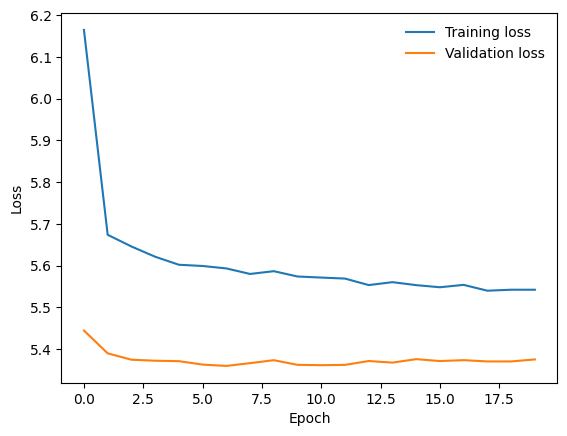

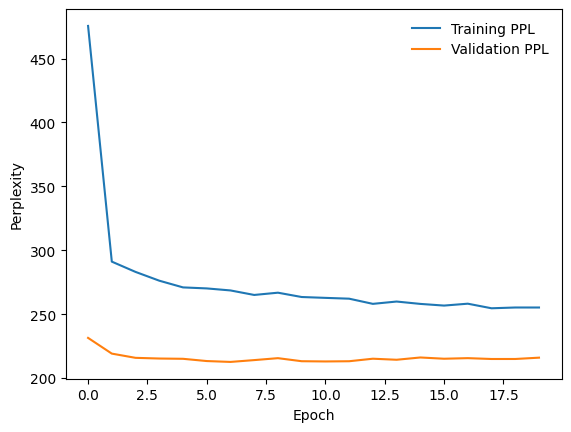

In [ ]:
import time
import math
import torch
import matplotlib.pyplot as plt

N_EPOCHS = 20
CLIP = 1
best_valid_loss = float('inf')
train_losses = []
train_ppls = []
valid_losses = []
valid_ppls = []

for epoch in range(N_EPOCHS):
    start_time = time.time()
    train_loss = train(model, train_iteration, optimizer, criterion, CLIP, summaryWriter=None)
    valid_loss = evaluate(model, valid_iteration, criterion, summaryWriter=None)
    train_ppl = math.exp(train_loss)
    valid_ppl = math.exp(valid_loss)
    train_losses.append(train_loss)
    train_ppls.append(train_ppl)
    valid_losses.append(valid_loss)
    valid_ppls.append(valid_ppl)
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'Seq2SeqModel.pt')
    print(f"Epoch: {epoch+1:02} | Time {epoch_mins}m {epoch_secs}s")
    print(f"\tTrain Loss: {train_loss:.3f} | Train PPL: {train_ppl:.3f}")
    print(f"\tValid Loss: {valid_loss:.3f} | Valid PPL: {valid_ppl:.3f}")

# Plot the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Plot the training and validation perplexity
plt.plot(train_ppls, label='Training PPL')
plt.plot(valid_ppls, label='Validation PPL')
plt.legend(frameon=False)
plt.xlabel('Epoch')
plt.ylabel('Perplexity')
plt.show()


In [ ]:
def test():
    best_model = Seq2Seq(encoder, decoder, device).to(device)
    best_model.load_state_dict(torch.load('Seq2SeqModel.pt'))
    
    test_loss = evaluate(model, test_iteration, criterion)
    
    print(f"Test Loss : {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f}")
    
test()

Test Loss : 5.189 | Test PPL: 179.263
